# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

Iter     Function value   Gradient norm 
     0     3.123835e+01     7.884732e+00
 * time: 0.004153013229370117
     1     2.875280e+01     4.585710e+00
 * time: 0.01849985122680664
     2     2.224777e+01     7.584500e+00
 * time: 0.03638195991516113
     3     1.785796e+01     7.965668e+00
 * time: 0.05453181266784668
     4     1.502900e+01     6.031423e+00
 * time: 0.07254290580749512
     5     1.091338e+01     2.457108e+00
 * time: 0.09101200103759766
     6     9.945721e+00     1.931188e+00
 * time: 0.10559296607971191
     7     9.194840e+00     1.134613e+00
 * time: 0.1201479434967041
     8     8.801542e+00     9.632968e-01
 * time: 0.13463997840881348
     9     8.528811e+00     9.877343e-01
 * time: 0.14997482299804688
    10     8.365360e+00     8.908028e-01
 * time: 0.16538500785827637
    11     8.234446e+00     8.308193e-01
 * time: 0.18079400062561035
    12     8.136578e+00     6.319476e-01
 * time: 0.26730799674987793
    13     8.087562e+00     5.412992e-01
 * time:

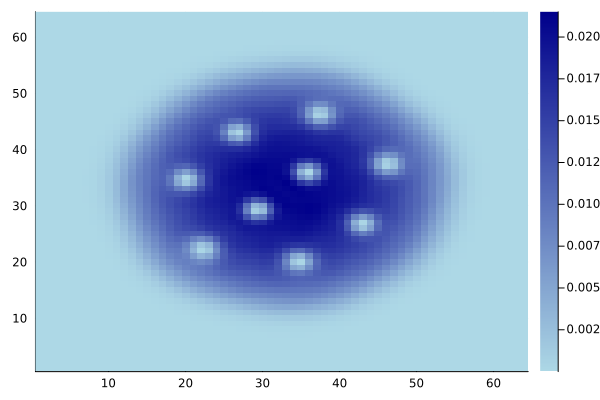

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential, and magnetic vector potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);


# Parameters
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

# Collect all the terms, build and run the model
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)